# 1. Imports 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Salary_Data.csv")

# 2. Exploratory Data Analysis

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.shape  

(30, 2)

**==>** Le data frame se compose de 30 lignes et 2 colonnes 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**==>** On a 0 valeurs nulls 


In [58]:
#any outliers

df.skew()



YearsExperience    0.37956
Salary             0.35412
dtype: float64

**==>** Les deux variables présentent une asymétrie faible et sont presque symétriques

In [59]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

**==>** Les valeurs de kurtosis négatives pour YearsExperience et Salary montrent que leurs distributions sont plus aplaties que la normale, avec moins de valeurs extrêmes (outliers)

In [10]:
#check any correlation and covariance

df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**==>** Les années d'expérience et le salaire sont fortement corrélés positivement (corr = 0.978), indiquant que l'augmentation de l'un entraîne celle de l'autre.

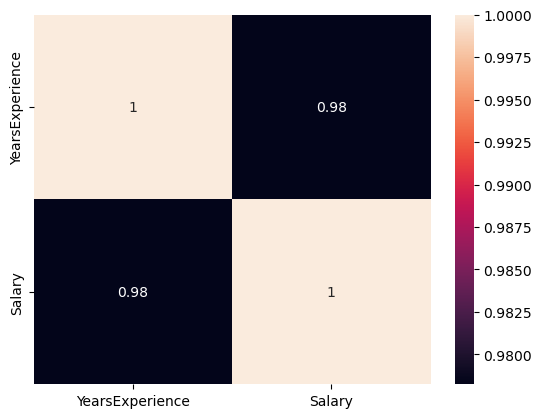

In [12]:
sns.heatmap(df.corr(),annot=True)
plt.show()

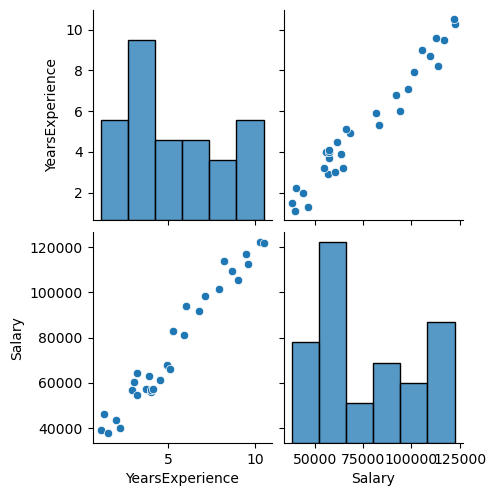

In [13]:
sns.pairplot(df)
plt.show()

**==>** Les histogrammes indiquent que les deux variables sont bien réparties, sans écarts ou valeurs extrêmes évidentes.

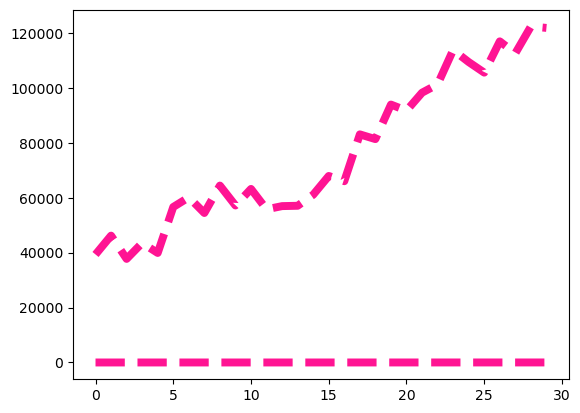

In [62]:
plt.plot(df, linestyle = '--', linewidth='5.7', color='#FF1493')

plt.show()

**==>** Le graphique montre une progression globale des salaires en fonction de l'expérience

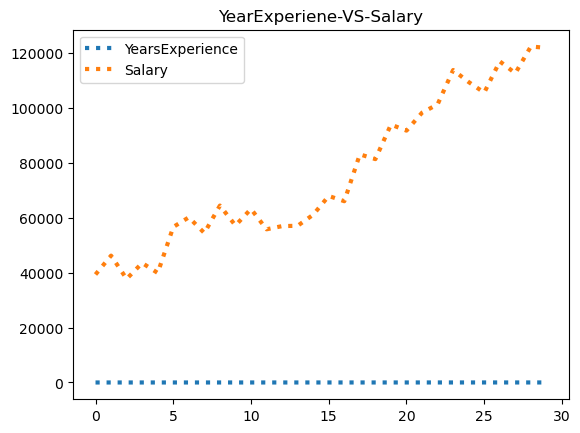

In [16]:
df.plot.line(linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

On a une corrélation positive entre les années d'expérience et les salaires, avec une progression régulière des salaires (courbe orange) tandis que les années d'expérience (courbe bleue) restent constantes en valeur absolue.

Plot a Specific Column




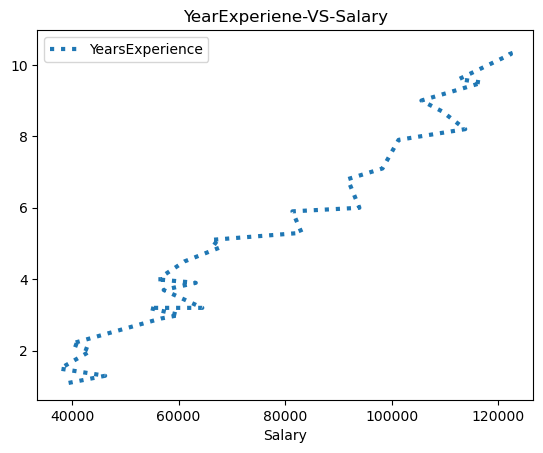

In [17]:
df = pd.DataFrame(data=df)

df.plot.line(x='Salary',linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

Le graphique montre une relation linéaire claire entre le salaire (variable dépendante) et les années d'expérience (variable indépendante)

# 3.Independent and Dependent Variables



In [18]:
X=df.drop('Salary',axis=1)
X.head()


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [19]:
y=df.Salary
y.head()


0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

# 4.Splitting the data



In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)
print(X_train.shape)
X_test.shape


(21, 1)


(9, 1)

In [21]:
import gradient as gd 

In [22]:
# Convertir y_train et y_test en tableaux NumPy
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# 5.Using the class DataPreprocessor 

## Normalize the data and handle the outliers 

In [23]:
import gradient as gd 
preprocessor = gd.DataPreprocessor()
# Étape 1 : Gérer les valeurs aberrantes dans les caractéristiques
X_train_cleaned = preprocessor.handle_outliers(X_train)

# Étape 2 : Normaliser les caractéristiques et les cibles
X_train_normalized, y_train_normalized = preprocessor.normalize(X_train_cleaned, y_train, is_training=True)

# Pour les données de test
X_test_cleaned = preprocessor.handle_outliers(X_test)
X_test_normalized, y_test_normalized = preprocessor.normalize(X_test_cleaned, y_test, is_training=False)


In [24]:
# Vérifiez les données normalisées
print("X_train_normalized.mean:", X_train_normalized.mean())
print("X_train_normalized.std:", X_train_normalized.std())
print("y_train_normalized.mean:", y_train_normalized.mean())
print("y_train_normalized.std:", y_train_normalized.std())

X_train_normalized.mean: 5.551115123125783e-17
X_train_normalized.std: 1.0
y_train_normalized.mean: 2.32618157540509e-16
y_train_normalized.std: 1.0000000000000002


# 6.Testing the class GradientDescent 

## 6.1 Sans régularisation 

### alpha=1e-3

In [25]:
model = gd.GradientDescent(regularize=False, bias=True, alpha=1e-3)
model.fit(X_train_normalized, y_train_normalized)

1000 : cost function = 0.04907308518808509
2000 : cost function = 0.031550533924993934
3000 : cost function = 0.02918148630145015

Finish: 3470 steps, cost function = 0.028955725769087108


In [26]:
# Faire des prédictions sur les données de test normalisées
y_pred_normalized = model.predict(X_test_normalized)
# Inverser la normalisation des prédictions
y_pred = preprocessor.scaler_target.inverse_transform(y_pred_normalized)
# Calculer le R^2 entre y_test et y_pred
r2_score = model.score(y_test, y_pred)
print(f"R^2 Score: {r2_score}")

R^2 Score: 0.7867356466166535


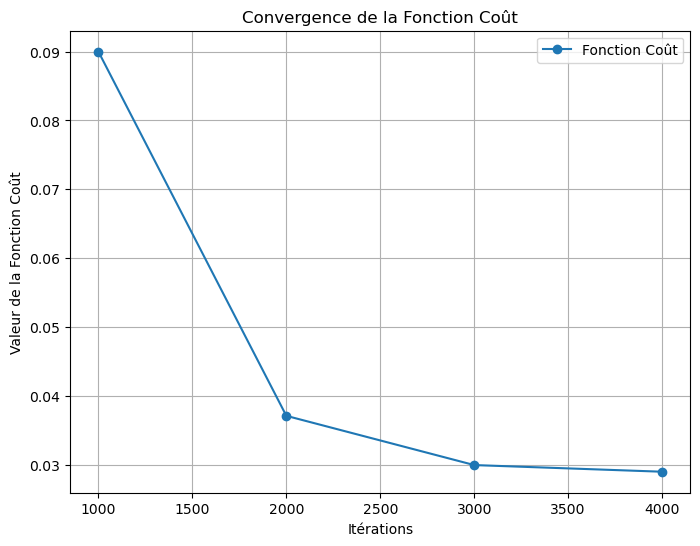

In [27]:
import matplotlib.pyplot as plt

# Liste des valeurs de la fonction coût
costFctEvol = [
    0.08998648117989165,  # 1000 itérations
    0.037082022010844574, # 2000 itérations
    0.02992934307799429,  # 3000 itérations
    0.028962301419880685  # 4000 itérations
]

# Tracer le graphe
plt.figure(figsize=(8, 6))
plt.plot([1000, 2000, 3000, 4000], costFctEvol, marker='o', label='Fonction Coût')
plt.xlabel('Itérations')
plt.ylabel('Valeur de la Fonction Coût')
plt.title('Convergence de la Fonction Coût')
plt.legend()
plt.grid(True)
plt.show()


### alpha=1e-4

In [28]:
model = gd.GradientDescent(regularize=False, bias=True, alpha=1e-4)
model.fit(X_train_normalized, y_train_normalized)

1000 : cost function = 0.5201579850999257
2000 : cost function = 0.4310878853567136
3000 : cost function = 0.35816418480649465
4000 : cost function = 0.29845990562336494
5000 : cost function = 0.2495786650132233
6000 : cost function = 0.20955849030752544
7000 : cost function = 0.1767930702101022
8000 : cost function = 0.14996728141593674
9000 : cost function = 0.12800440279910674
10000 : cost function = 0.11002289847731979
11000 : cost function = 0.09530103513165311
12000 : cost function = 0.08324791340780073
13000 : cost function = 0.07337975067059034
14000 : cost function = 0.06530046315992359
15000 : cost function = 0.058685768163672936
16000 : cost function = 0.053270168107893326
17000 : cost function = 0.048836294137773406
18000 : cost function = 0.04520618146689272
19000 : cost function = 0.04223412630878627
20000 : cost function = 0.039800837685630794
21000 : cost function = 0.03780864938204958
22000 : cost function = 0.03617759986364951
23000 : cost function = 0.034842222817869

In [29]:
# Faire des prédictions sur les données de test normalisées
y_pred_normalized = model.predict(X_test_normalized)


In [30]:
# Inverser la normalisation des prédictions
y_pred = preprocessor.scaler_target.inverse_transform(y_pred_normalized)


In [31]:
# Calculer le R^2 entre y_test et y_pred
r2_score = model.score(y_test, y_pred)
print(f"R^2 Score: {r2_score}")

R^2 Score: 0.7945467451747082


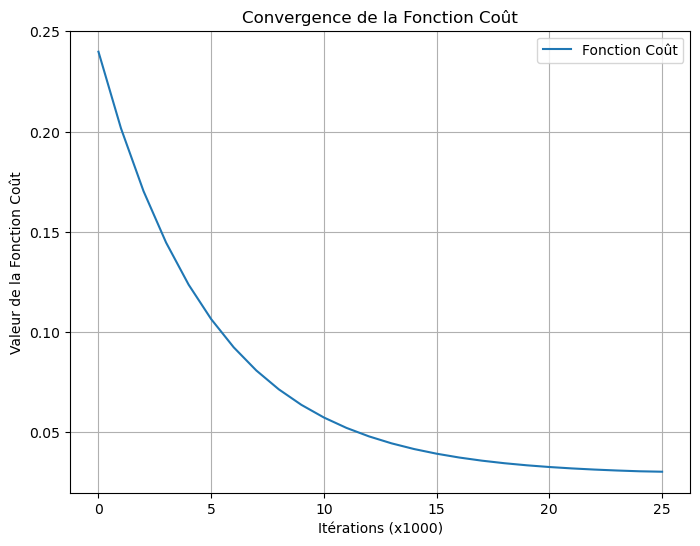

In [32]:
import matplotlib.pyplot as plt

# Liste des valeurs de la fonction coût
costFctEvol = [
    0.23979190162170852, 0.201545846277978, 0.17023293773567097, 0.1445963529279888,
    0.123607102449596, 0.10642272945492531, 0.0923534955142488, 0.0808346962110176,
    0.07140399529669701, 0.06368286765187232, 0.057361406219759103, 0.0521858830998322,
    0.04794856553449459, 0.04447937802755672, 0.041639075932489396, 0.03931365651508683,
    0.03740978316435277, 0.035851039090699054, 0.03457486014412482, 0.033530023643247704,
    0.03267459242296654, 0.03197423157988973, 0.03140083035383435, 0.030931373831111858,
    0.03054701918254788, 0.030327488849257806  # Dernière valeur
]

# Tracer le graphe
plt.figure(figsize=(8, 6))
plt.plot(costFctEvol, label='Fonction Coût')
plt.xlabel('Itérations (x1000)')
plt.ylabel('Valeur de la Fonction Coût')
plt.title('Convergence de la Fonction Coût')
plt.legend()
plt.grid(True)
plt.show()


### alpha=1e-5

In [33]:
model = gd.GradientDescent(regularize=False, bias=True, alpha=1e-5)
model.fit(X_train_normalized, y_train_normalized)

1000 : cost function = 0.46289545862934256
2000 : cost function = 0.45429997022687596
3000 : cost function = 0.44587468474088887
4000 : cost function = 0.43761623191114446
5000 : cost function = 0.42952130821336
6000 : cost function = 0.42158667553774104
7000 : cost function = 0.41380915989368006
8000 : cost function = 0.40618565014010516
9000 : cost function = 0.39871309674096966
10000 : cost function = 0.391388510545387
11000 : cost function = 0.3842089615919159
12000 : cost function = 0.3771715779365253
13000 : cost function = 0.3702735445037687
14000 : cost function = 0.3635121019607043
15000 : cost function = 0.3568845456131125
16000 : cost function = 0.35038822432357386
17000 : cost function = 0.3440205394509664
18000 : cost function = 0.33777894381096485
19000 : cost function = 0.3316609406571222
20000 : cost function = 0.3256640826821287
21000 : cost function = 0.31978597103884643
22000 : cost function = 0.31402425438072745
23000 : cost function = 0.30837662792123666
24000 : co

In [34]:
# Faire des prédictions sur les données de test normalisées
y_pred_normalized = model.predict(X_test_normalized)
# Inverser la normalisation des prédictions
y_pred = preprocessor.scaler_target.inverse_transform(y_pred_normalized)
# Calculer le R^2 entre y_test et y_pred
r2_score = model.score(y_test, y_pred)
print(f"R^2 Score: {r2_score}")

R^2 Score: 0.7192805238652672


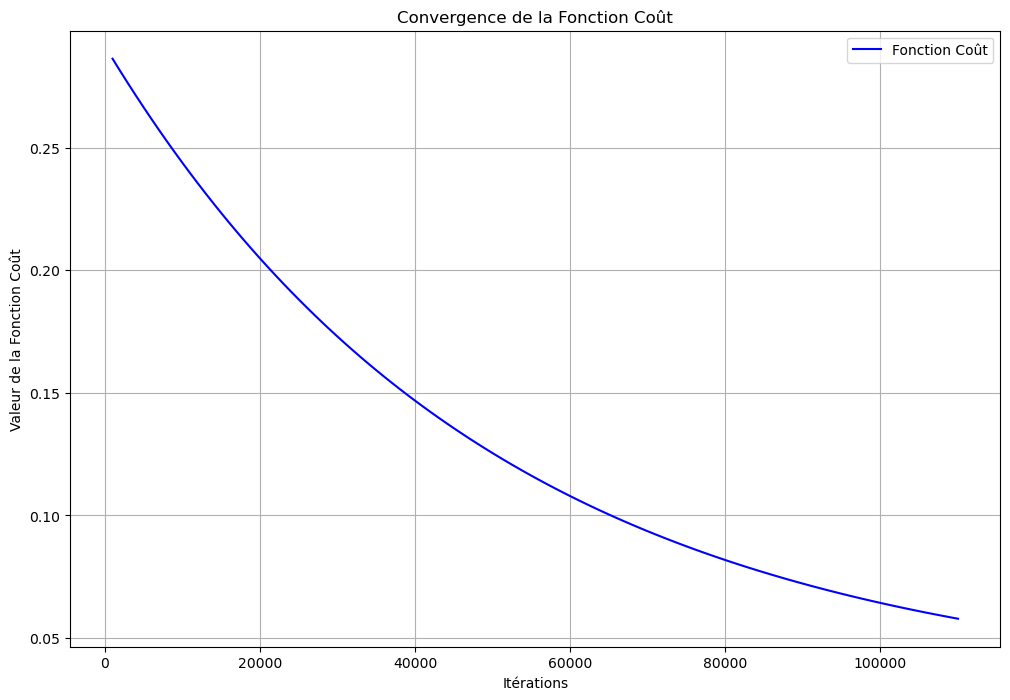

In [35]:
import matplotlib.pyplot as plt

# Ajuster les données pour qu'elles aient la même longueur
iterations = list(range(1000, 111000, 1000))  # Génère 110 valeurs correspondant à cost_values

cost_values = [
    0.2862246409331218, 0.2811274864263855, 0.27613126284086814, 0.2712339716005331,
    0.26643365370399447, 0.2617283889408867, 0.25711629512374373, 0.2525955273350934,
    0.24816427718945905, 0.24382077210997138, 0.2395632746193087, 0.23539008164467679,
    0.23129952383654795, 0.22728996490089365, 0.22335980094463964, 0.21950745983407777,
    0.21573140056598833, 0.21203011265121013, 0.2084021155104208, 0.2048459578818766,
    0.2013602172408842, 0.19794349923076682, 0.19459443710509464, 0.19131169118096494,
    0.1880939483031067, 0.18493992131859255, 0.18184834856195703, 0.17881799335050946,
    0.17584764348963752, 0.17293611078790946, 0.17008223058177624, 0.16728486126968656,
    0.16454288385542695, 0.16185520150050223, 0.15922073908538298, 0.15663844277943784,
    0.15410727961938392, 0.1516262370960817, 0.14919432274951663, 0.14681056377179658,
    0.14447400661800827, 0.14218371662479062, 0.13993877763644516, 0.13773829163846618,
    0.13558137839830955, 0.1334671751132916, 0.13139483606545135, 0.12936353228324818,
    0.12737245120995944, 0.12542079637864176, 0.1235077870935339, 0.1216326581177621,
    0.11979465936723284, 0.117993055610586, 0.11622712617509011, 0.11449616465836157,
    0.11279947864578842, 0.11113638943355617, 0.10950623175715249, 0.1079083535252493,
    0.10634211555885739, 0.10480689133564033, 0.10330206673929812, 0.10182703981390853,
    0.10038122052313277, 0.09896403051419203, 0.09757490288651867, 0.09621328196498279,
    0.09487862307761301, 0.0935703923377202, 0.09228806643033224, 0.09103113240285748,
    0.0897990874598977, 0.08859143876211995, 0.08740770322911164, 0.0862474073461413,
    0.08511008697474284, 0.08399528716705505, 0.08290256198382966, 0.08183147431605249,
    0.08078159571009132, 0.07975250619630438, 0.0787437941210486, 0.07775505598200862,
    0.07678589626679029, 0.07583592729470891, 0.07490476906170843, 0.07399204908835524,
    0.07309740227083919, 0.07222047073492543, 0.07136090369279953, 0.07051835730274482,
    0.06969249453159986, 0.06888298501994254, 0.06808950494993508, 0.06731173691579559,
    0.06654936979682875, 0.0658020986329723, 0.06506962450280775, 0.06435165440398669,
    0.06364790113602398, 0.0629580831854143, 0.062281924613019554, 0.06161915494369039,
    0.060969509058071386, 0.06033272708654694, 0.05970855430529069, 0.05909674103437115,
    0.058497042537874855, 0.057909218926007366
]

# Tracer le graphe
plt.figure(figsize=(12, 8))
plt.plot(iterations, cost_values, label="Fonction Coût", color="blue", linewidth=1.5)
plt.xlabel("Itérations")
plt.ylabel("Valeur de la Fonction Coût")
plt.title("Convergence de la Fonction Coût")
plt.legend()
plt.grid(True)
plt.show()


**==>** On constate que pour alpha=1e-4 on a le meilleure coefficient de détermination qui est R^2 Score: 0.7945467451747082


## 6.2 Avec Regularisation Ridge 

In [46]:
import gradient as gd
# Test avec régularisation Ridge
model_ridge = gd.GradientDescent(regularize=True, regularization='ridge', alpha=1e-4, lmb=0.01)
model_ridge.fit(X_train_normalized, y_train_normalized)

# Prédictions pour l'ensemble de test
y_pred_ridge = model_ridge.predict(X_test_normalized)

# Calcul du score R²
r2_ridge = model_ridge.score(y_test_normalized, y_pred_ridge)
print(f"R² avec Ridge : {r2_ridge}")

1000 : cost function = 0.29621052482331556
2000 : cost function = 0.24775686738546648
3000 : cost function = 0.20809054297447213
4000 : cost function = 0.1756179211853644
5000 : cost function = 0.14903438511247924
6000 : cost function = 0.12727191718710162
7000 : cost function = 0.10945619060713853
8000 : cost function = 0.09487144246826307
9000 : cost function = 0.08293171734284102
10000 : cost function = 0.07315732599146431

Finish: 10000 steps, cost function = 0.07315732599146431
R² avec Ridge : 0.9010360419356124


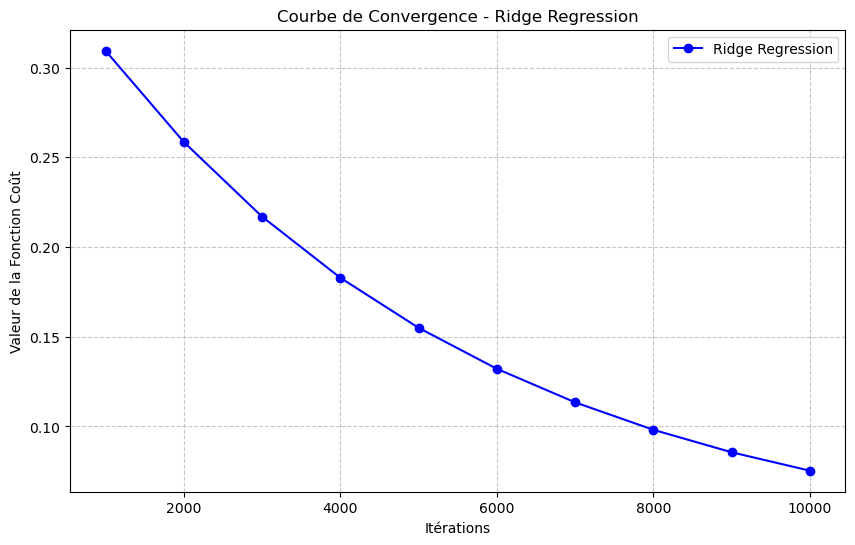

In [37]:
import matplotlib.pyplot as plt

# Données de convergence
iterations = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
cost_values = [0.30943744838091114, 0.25858501676651163, 0.21695494885900468, 
               0.18287471908504044, 0.1549751234363679, 0.13213527046230988, 
               0.11343754844348228, 0.0981307595122911, 0.08559993960021221, 
               0.07534165170097902]

# Tracer la courbe de convergence
plt.figure(figsize=(10, 6))
plt.plot(iterations, cost_values, marker='o', color='blue', label="Ridge Regression")
plt.xlabel("Itérations")
plt.ylabel("Valeur de la Fonction Coût")
plt.title("Courbe de Convergence - Ridge Regression")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


## 6.3 Avec Regularisation Lasso 

In [53]:
# Test avec régularisation Lasso
model_lasso = gd.GradientDescent(regularize=True, regularization='lasso', alpha=1e-5, lmb=0.01)
model_lasso.fit(X_train_normalized, y_train_normalized)

# Prédictions pour l'ensemble de test
y_pred_lasso = model_lasso.predict(X_test_normalized)

# Calcul du score R²
r2_lasso = model_lasso.score(y_test_normalized, y_pred_lasso)
print(f"R² avec Lasso : {r2_lasso}")


1000 : cost function = 0.11966718770347419
2000 : cost function = 0.11787833137781233
3000 : cost function = 0.11612489458328412
4000 : cost function = 0.114406175821921
5000 : cost function = 0.11272148749107291
6000 : cost function = 0.11107015560815008
7000 : cost function = 0.10945151954081699
8000 : cost function = 0.1078649317425319
9000 : cost function = 0.10630975749332794
10000 : cost function = 0.10478537464572331

Finish: 10000 steps, cost function = 0.10478537464572331
R² avec Lasso : 0.8846660099030129


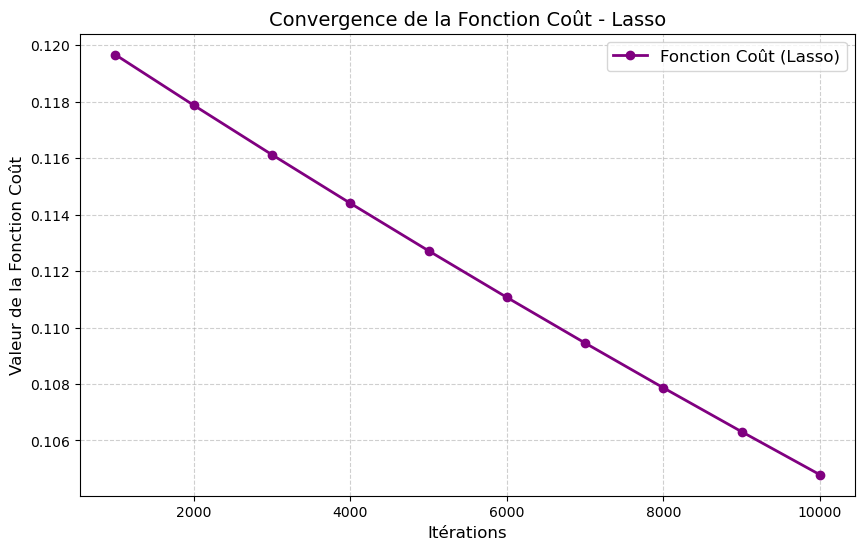

In [57]:
# Données de la fonction coût pour Lasso
iterations_lasso = list(range(1000, 11000, 1000))
cost_values_lasso = [
    0.11966718770347419,
    0.11787833137781233,
    0.11612489458328412,
    0.114406175821921,
    0.11272148749107291,
    0.11107015560815008,
    0.10945151954081699,
    0.1078649317425319,
    0.10630975749332794,
    0.10478537464572331
]

# Tracer le graphe de convergence pour Lasso
plt.figure(figsize=(10, 6))
plt.plot(iterations_lasso, cost_values_lasso, marker='o', linestyle='-', color='purple', linewidth=2, markersize=6, label='Fonction Coût (Lasso)')
plt.xlabel('Itérations', fontsize=12)
plt.ylabel('Valeur de la Fonction Coût', fontsize=12)
plt.title('Convergence de la Fonction Coût - Lasso', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


## 6.4 Avec Regularisation ElasticNet  

In [55]:
# Test avec régularisation ElasticNet
model_elasticnet = gd.GradientDescent(regularize=True, regularization='elasticnet', alpha=1e-4, lmb=0.01, alpha_net=0.5)
model_elasticnet.fit(X_train_normalized, y_train_normalized)

# Prédictions pour l'ensemble de test
y_pred_elasticnet = model_elasticnet.predict(X_test_normalized)

# Calcul du score R²
r2_elasticnet = model_elasticnet.score(y_test_normalized, y_pred_elasticnet)
print(f"R² avec ElasticNet : {r2_elasticnet}")


1000 : cost function = 0.37461007757517867
2000 : cost function = 0.3119768045892694
3000 : cost function = 0.26070079638804056
4000 : cost function = 0.2187225056083196
5000 : cost function = 0.18435588027877078
6000 : cost function = 0.15622062980577225
7000 : cost function = 0.13318677475637766
8000 : cost function = 0.11432925271793705
9000 : cost function = 0.09889075652190904
10000 : cost function = 0.08625131185841364

Finish: 10000 steps, cost function = 0.08625131185841364
R² avec ElasticNet : 0.9119416124486359


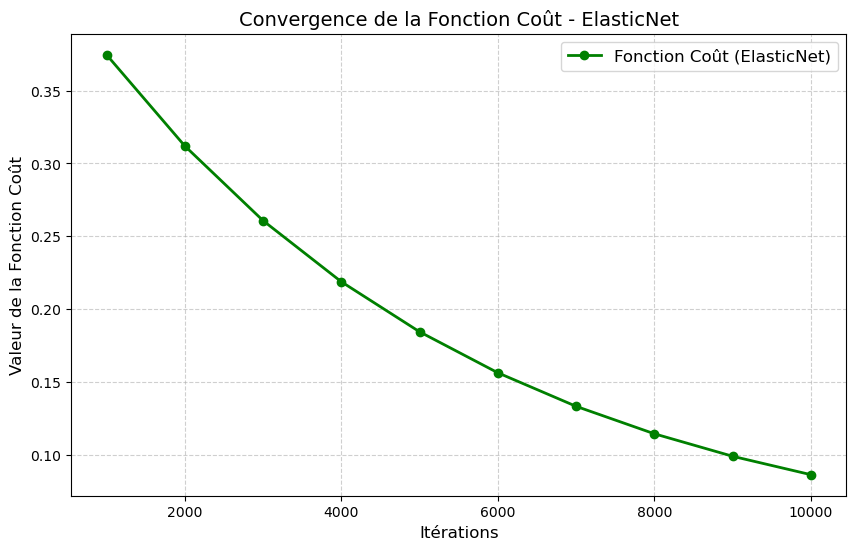

In [56]:
# Données de la fonction coût pour ElasticNet
iterations_elasticnet = list(range(1000, 11000, 1000))
cost_values_elasticnet = [
    0.37461007757517867,
    0.3119768045892694,
    0.26070079638804056,
    0.2187225056083196,
    0.18435588027877078,
    0.15622062980577225,
    0.13318677475637766,
    0.11432925271793705,
    0.09889075652190904,
    0.08625131185841364
]

# Tracer le graphe de convergence pour ElasticNet
plt.figure(figsize=(10, 6))
plt.plot(iterations_elasticnet, cost_values_elasticnet, marker='o', linestyle='-', color='green', linewidth=2, markersize=6, label='Fonction Coût (ElasticNet)')
plt.xlabel('Itérations', fontsize=12)
plt.ylabel('Valeur de la Fonction Coût', fontsize=12)
plt.title('Convergence de la Fonction Coût - ElasticNet', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


**==>** Apres tester plusieurs alpha et lambda pour chaque modele avec regularisation , j'ai laissé les meilleurs resultats pour chaque modele , on constate que avec regularisation Ridge on a le meilleur coefficient de determination qui est R² avec Ridge : 0.9010360419356124
